In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('training.csv', sep=';', decimal=',')
validation = pd.read_csv('validation.csv', sep=';', decimal=',')

In [3]:
# pre-processing

# 1st, Impute missing Numerci values
numeric_features = train.select_dtypes(np.number)
for col in numeric_features.columns:
    # Train dataset
    if train[col].isnull().values.any():
        train[col] = train[col].fillna(train[col].mean())
    # Validation dataset
    if validation[col].isnull().values.any():
        validation[col] = validation[col].fillna(validation[col].mean())

# 2nd, Impute categorical missing values
categorical_features = train.select_dtypes(np.object)
for col in categorical_features.columns:
    # Train dataset
    if train[col].isnull().values.any():
        train[col] = train[col].fillna(train[col].value_counts().index[0])
    # Validation dataset
    if validation[col].isnull().values.any():
        validation[col] = validation[col].fillna(validation[col].value_counts().index[0])

In [4]:
# Feature Transformation

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Train dataset
for col in categorical_features.columns:
    train[col] = le.fit_transform(train[col])
    
# Validation dataset
for col in categorical_features.columns:
    validation[col] = le.fit_transform(validation[col])

In [5]:
# Specifying the features (X) and the target (y) FOR Train dataset
X = train.loc[:, train.columns != 'classLabel']
y = train.loc[:, 'classLabel']

In [6]:
# Specifying the features (X) and the target (y) FOR Validation dataset
X_val = validation.loc[:, validation.columns != 'classLabel']
y_val = validation.loc[:, 'classLabel']

In [7]:
# Split the X, y train set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
# Train the Model
from sklearn.tree import DecisionTreeClassifier

DC = DecisionTreeClassifier(max_features=2, min_samples_split=9, random_state=0).fit(X_train, y_train)
DC.score(X_test, y_test)

0.9924324324324324

In [9]:
# predict and evaluate the Model using: Accuracy_score
from sklearn import metrics

DC_pred = DC.predict(X_val)

print(metrics.confusion_matrix(y_val, DC_pred))
metrics.accuracy_score(y_val, DC_pred)

[[83 24]
 [17 76]]


0.795

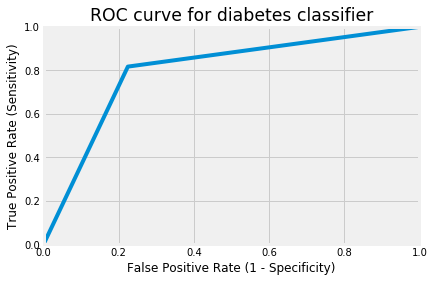

In [10]:
# Plot the evaluation result using roc_curve

fpr, tpr, thresholds = metrics.roc_curve(y_val, DC_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_val, DC_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       107
           1       0.76      0.82      0.79        93

   micro avg       0.80      0.80      0.80       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200

